In [1]:
# importing
import numpy as np
from math import *
import matplotlib.pyplot as pyplt
from matplotlib.colors import LogNorm
# cosmology stuff.
# If you dont have cosmolopy installed, run:
# git install cosmolopy 
import cosmolopy.distance as cosdist
# triaxial NFW
from triNFW import triNFW

In [2]:
# set up the cosmology in cosmolopy
cosmo       = {'omega_M_0' : 0.27, 'omega_lambda_0' : 0.73, 'h' : 1.0}
cosmo       = cosdist.set_omega_k_0(cosmo)


In [3]:
# construct a triNFW object
mass      = 1E14   # Msun/h, since h = 1
concen    = 3.0    # concentration
zd        = 0.4    # cluster redshift
overden   = 500.0  # 500 times of `wrt`. If overden < 0.0, then it is caluclated as virial density
wrt       = "crit" # overdensity type: crit or mean
qa        = 0.5    # the axis ratio, 0 < aq := a/c <= qb := b/c <= 1.
qb        = 0.8    # the axis ratio, 0 < aq := a/c <= qb := b/c <= 1.
theta     = pi/7.  # First Euler angle
phi       = pi/9.  # Secon Euler angle
psi       = pi/3. # Third Euler angle

# construct this halo
halo  = triNFW.pNFW(mass    = mass,
                    concen  = concen,
                    zd      = zd,
                    overden = overden,
                    wrt     = wrt,
                    qa      = qa,
                    qb      = qb,
                    theta   = theta,
                    phi     = phi,
                    psi     = psi,
                    cosmo   = cosmo)
    

/Users/inchiu/miniconda3/envs/py2/lib/python2.7/site-packages/triNFW/triNFW.py:216: RuntimeWarning: invalid value encountered in sqrt
  case_smaller_than_one   =   1.0 / (1.0 - X**2) * ( -1.0 + 2.0/np.sqrt(1.0-X**2) * np.arctanh( np.sqrt((1.0 - X)/(1.0 + X)) ) )
/Users/inchiu/miniconda3/envs/py2/lib/python2.7/site-packages/triNFW/triNFW.py:217: RuntimeWarning: invalid value encountered in sqrt
  case_larger_than_one    =   1.0 / (X**2 - 1.0) * (  1.0 - 2.0/np.sqrt(X**2-1.0) * np.arctan(  np.sqrt((X - 1.0)/(1.0 + X)) ) )


Text(0,0.5,'Sigma')

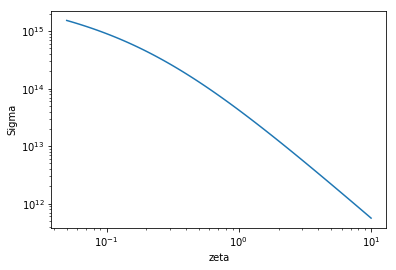

In [4]:
# two methods can be used in the object

# first is to calc equation 36 in Umetsu+15
zeta       = 10.0**np.linspace(log10(0.05), log10(10.0), 100)
sigma      = halo.Sigma(zeta = zeta) # unit should be Msun/Mpc**2. Since h = 1, so it is equal to Msun/h/(Mpc/h)**2
# plot
pyplt.plot(zeta, sigma)
pyplt.loglog()
pyplt.xlabel("zeta")
pyplt.ylabel("Sigma")


/Users/inchiu/miniconda3/envs/py2/lib/python2.7/site-packages/triNFW/triNFW.py:216: RuntimeWarning: divide by zero encountered in arctanh
  case_smaller_than_one   =   1.0 / (1.0 - X**2) * ( -1.0 + 2.0/np.sqrt(1.0-X**2) * np.arctanh( np.sqrt((1.0 - X)/(1.0 + X)) ) )


Text(0,0.5,'y [Mpc/h]')

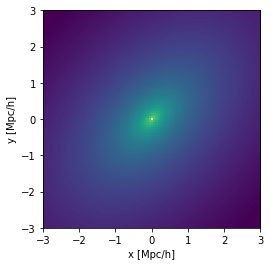

In [5]:
# Second is to calculate the projected map

# make coordinates
xmpc_edges        = np.linspace(-3.0, 3.0, 100) # Mpc/h
ympc_edges        = np.linspace(-3.0, 3.0, 100) # Mpc/h
xmpc_bins         = 0.5 * (xmpc_edges[1:] + xmpc_edges[:-1])
ympc_bins         = 0.5 * (ympc_edges[1:] + ympc_edges[:-1])
xmpc_mesh, ympc_mesh  =  np.meshgrid(xmpc_bins, ympc_bins)

# mapping
map_is            = halo.Sigma_XY(XX = xmpc_mesh, YY = ympc_mesh) # ordering is (ny, nx)

# plotting
pyplt.imshow(map_is[::-1], 
             interpolation = "nearest", 
             norm = LogNorm(vmin=1E12, vmax=1E16), 
             extent = [xmpc_edges[0], xmpc_edges[-1], ympc_edges[0], ympc_edges[-1]]
            )
pyplt.xlabel("x [Mpc/h]")
pyplt.ylabel("y [Mpc/h]")